<a href="https://colab.research.google.com/github/simzx02/Capstone/blob/main/YOLO_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YOLO Model for image classification

#Install Library

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 22.1 MB/s eta 0:00:00


#Data Preparation
Upload Dataset to Colab: my path is >> "D:\Capstone\Capstone_data_newtrain.zip"

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Capstone_data_newtrain.zip to Capstone_data_newtrain.zip


In [ ]:
import zipfile
import os

# Extract the dataset
with zipfile.ZipFile("Capstone_data_newtrain.zip", 'r') as zip_ref:
    zip_ref.extractall("Capstone_data_newtrain")

## Data Spliting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Split data into train and val:

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define dataset directories
base_dir = "Capstone_data_newtrain/Capstone_data_newtrain"
output_dir = "dataset"

# Create train/val directories
classes = ["No_holder", "No_solution_holder", "Perfect_Solution", "Spill_Solution_Holder"]
for split in ["train", "val"]:
    for cls in classes:
        os.makedirs(os.path.join(output_dir, "images", split, cls), exist_ok=True)

# Split the dataset
for cls in classes:
    class_path = os.path.join(base_dir, cls)
    images = os.listdir(class_path)

    # Split into train (80%) and val (20%)
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

    # Copy images to respective folders
    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_dir, "images", "train", cls))
    for img in val_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_dir, "images", "val", cls))

print("Dataset split completed!")

Dataset split completed!


In [ ]:
#Check Distribution
for split in ["train", "val"]:
    for cls in classes:
        path = os.path.join(output_dir, "images", split, cls)
        print(f"{split}/{cls}: {len(os.listdir(path))} images")

train/No_holder: 32 images
train/No_solution_holder: 40 images
train/Perfect_Solution: 50 images
train/Spill_Solution_Holder: 98 images
val/No_holder: 8 images
val/No_solution_holder: 10 images
val/Perfect_Solution: 13 images
val/Spill_Solution_Holder: 25 images


#YOLO Classification Model Train

Check the file structure or use the panel at the left.

In [ ]:
!ls -R dataset

dataset:
images

dataset/images:
train  val

dataset/images/train:
No_holder  No_solution_holder  Perfect_Solution  Spill_Solution_Holder

dataset/images/train/No_holder:
image_10.jpg  image_16.jpg  image_20.jpg  image_25.jpg	image_32.jpg  image_38.jpg  image_6.jpg
image_11.jpg  image_17.jpg  image_21.jpg  image_27.jpg	image_33.jpg  image_39.jpg  image_9.jpg
image_12.jpg  image_18.jpg  image_22.jpg  image_28.jpg	image_35.jpg  image_3.jpg
image_13.jpg  image_19.jpg  image_23.jpg  image_2.jpg	image_36.jpg  image_4.jpg
image_15.jpg  image_1.jpg   image_24.jpg  image_31.jpg	image_37.jpg  image_5.jpg

dataset/images/train/No_solution_holder:
image_10.jpg  image_18.jpg  image_23.jpg  image_31.jpg	image_38.jpg  image_44.jpg  image_5.jpg
image_12.jpg  image_19.jpg  image_24.jpg  image_33.jpg	image_3.jpg   image_45.jpg  image_6.jpg
image_13.jpg  image_1.jpg   image_25.jpg  image_34.jpg	image_40.jpg  image_46.jpg  image_8.jpg
image_14.jpg  image_20.jpg  image_28.jpg  image_35.jpg	image_41.jpg  i

In [ ]:
from ultralytics import YOLO

# Load a YOLOv8 model for classification
model = YOLO('yolov8n-cls.pt')  # Use yolov8n-cls.pt for a lightweight model

# Train the model
model.train(data="dataset/images", epochs=50, imgsz=224)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.31M/5.31M [00:00<00:00, 104MB/s]


Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=dataset/images, epochs=50, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/images/train... 220 images, 0 corrupt: 100%|██████████| 220/220 [00:00<00:00, 3887.75it/s]

train: New cache created: /content/dataset/images/train.cache



val: Scanning /content/dataset/images/val... 56 images, 0 corrupt: 100%|██████████| 56/56 [00:00<00:00, 3261.38it/s]

val: New cache created: /content/dataset/images/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.289G      1.475         16        224:  50%|█████     | 7/14 [00:01<00:01,  6.78it/s]

       1/50     0.289G      1.455         16        224:  64%|██████▍   | 9/14 [00:01<00:00,  5.76it/s]
100%|██████████| 755k/755k [00:00<00:00, 18.5MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.81it/s]

                   all      0.768          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 44.96it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.88it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.80it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.06it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.36it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.60it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.45it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50     0.264G     0.1435         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.83it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50     0.262G     0.1174         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.18it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50     0.264G     0.1317         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.97it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50     0.262G    0.09533         12        224: 100%|██████████| 14/14 [00:01<00:00,  7.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.11it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.264G     0.1292         12        224: 100%|██████████| 14/14 [00:02<00:00,  5.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.49it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50     0.262G     0.0851         12        224: 100%|██████████| 14/14 [00:01<00:00,  8.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.13it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.264G    0.09209         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.74it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50     0.262G    0.09222         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.69it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50     0.264G     0.1014         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.01it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50     0.262G    0.08744         12        224: 100%|██████████| 14/14 [00:02<00:00,  6.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.97it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.264G     0.0891         12        224: 100%|██████████| 14/14 [00:02<00:00,  5.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.48it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50     0.262G    0.08149         12        224: 100%|██████████| 14/14 [00:01<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.11it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.264G    0.08791         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.40it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50     0.262G     0.1011         12        224: 100%|██████████| 14/14 [00:01<00:00, 10.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.11it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.264G     0.1168         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.43it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50     0.262G    0.08197         12        224: 100%|██████████| 14/14 [00:01<00:00,  8.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.59it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.264G     0.1073         12        224: 100%|██████████| 14/14 [00:02<00:00,  5.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.23it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50     0.262G    0.06074         12        224: 100%|██████████| 14/14 [00:01<00:00,  7.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.56it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50     0.264G    0.08919         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.61it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50     0.262G    0.09111         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.79it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50     0.264G    0.07236         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.09it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50     0.262G    0.07295         12        224: 100%|██████████| 14/14 [00:01<00:00,  7.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.19it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50     0.264G    0.09012         12        224: 100%|██████████| 14/14 [00:02<00:00,  5.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.28it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50     0.262G    0.05118         12        224: 100%|██████████| 14/14 [00:01<00:00,  7.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.06it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50     0.264G    0.06365         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.77it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50     0.262G    0.06289         12        224: 100%|██████████| 14/14 [00:01<00:00, 10.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.72it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50     0.264G    0.05403         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.11it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50     0.262G    0.06559         12        224: 100%|██████████| 14/14 [00:01<00:00,  7.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.91it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50     0.262G    0.03675         12        224: 100%|██████████| 14/14 [00:02<00:00,  5.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.66it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50     0.262G    0.04805         12        224: 100%|██████████| 14/14 [00:01<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.05it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50     0.264G    0.05681         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.57it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50     0.262G     0.0825         12        224: 100%|██████████| 14/14 [00:01<00:00,  7.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.18it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50     0.264G     0.0739         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.23it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50     0.262G    0.04729         12        224: 100%|██████████| 14/14 [00:02<00:00,  6.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.36it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50     0.264G    0.04795         12        224: 100%|██████████| 14/14 [00:02<00:00,  5.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.09it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50     0.262G    0.05215         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.03it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50     0.264G    0.03646         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.98it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50     0.262G    0.05838         12        224: 100%|██████████| 14/14 [00:01<00:00, 10.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 45.94it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50     0.264G     0.0586         12        224: 100%|██████████| 14/14 [00:01<00:00,  9.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.65it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50     0.262G    0.04985         12        224: 100%|██████████| 14/14 [00:02<00:00,  6.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.93it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50     0.264G    0.03267         12        224: 100%|██████████| 14/14 [00:02<00:00,  6.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.18it/s]

                   all          1          1



50 epochs completed in 0.043 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/images/train... found 220 images in 4 classes ✅ 
val: /content/dataset/images/val... found 56 images in 4 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.08it/s]


                   all          1          1
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x783468eccf10>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.06952030318123954, 'inference': 0.27695298194885254, 'loss': 0.0004512923104422433, 'postprocess': 0.0005577291761125837}
task: 'classify'
top1: 1.0
top5: 1.0

##Validate the model

In [ ]:
results = model.val(data="dataset/images")  # Validate the model on the dataset
print(results)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/images/train... found 220 images in 4 classes ✅ 
val: /content/dataset/images/val... found 56 images in 4 classes ✅ 
test: None...


val: Scanning /content/dataset/images/val... 56 images, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]


                   all          1          1
Speed: 0.3ms preprocess, 4.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78344bf5a4d0>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.2685614994594029, 'inference': 4.619210958480835, 'loss': 0.0013198171343122209, 'postprocess': 0.002184084483555385}
task: 'classify'
top1: 1.0
top5: 1.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the confusion matrix from the model
confusion_matrix = model.val().confusion_matrix.matrix  # Replace `model.val()` if already done

# Display the raw confusion matrix
print(confusion_matrix)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
train: /content/dataset/images/train... found 220 images in 4 classes ✅ 
val: /content/dataset/images/val... found 56 images in 4 classes ✅ 
test: None...


val: Scanning /content/dataset/images/val... 56 images, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]


                   all          1          1
Speed: 0.6ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3
[[          8           0           0           0]
 [          0          10           0           0]
 [          0           0          13           0]
 [          0           0           0          25]]


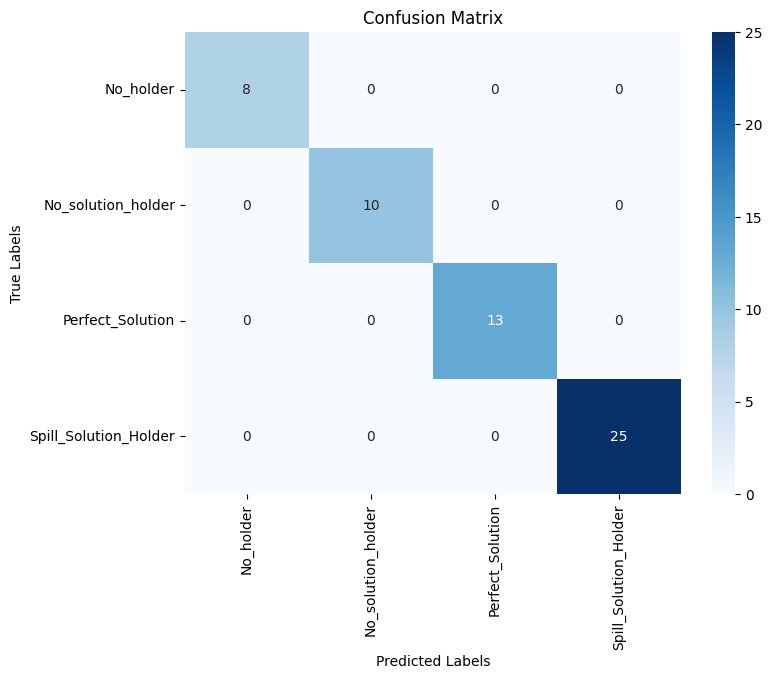

In [ ]:
# Labels (class names)
labels = ["No_holder", "No_solution_holder", "Perfect_Solution", "Spill_Solution_Holder"]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!find runs/ -name "*.pt"

runs/classify/train/weights/last.pt
runs/classify/train/weights/best.pt
